In [45]:
import numpy as np
import torch
import gymnasium as gym
from gymnasium import spaces

import imageio
import os
import random
import copy

#from Combined_Agent_Double.Dueling_DDQN_Agent import Dueling_DDQN_Agent
#from Combined_Agent_Double.utils.random_agent import RandomAgent
#from Combined_Agent_Double.utils.actions import MORE_ACTIONS
#import Combined_Agent_Double.utils.stats_functions as sf

from Agents.Prio_n_step.Prio_DQN_Agent import Prio_DQN_Agent
from Agents.Pablo.Adaptative_Dueling_Double_DQN.Agent import Adaptative_Dueling_Double_DQN
from Agents.Random.random_agent import RandomAgent
from Agents.utils.actions import MORE_ACTIONS
import Agents.utils.stats_functions as sf
import hockey.hockey_env as h_env

from Agents.Pablo.Agent import Dueling_DDQN_Agent
from Agents.Tapas_en_Mallorca.old.Agent import Combined_Agent
from Agents.Tapas_en_Mallorca.Adaptative_Dueling_Double_DQN.Agent import Adaptative_Dueling_Double_DQN_better_mem

from importlib import reload

In [46]:
SEED_TRAIN_1 = 7489
SEED_TRAIN_2 = 1312
SEEDS_TEST = [291 +  563 *i for i in range(10)]

seed = SEED_TRAIN_1

USE_MORE_ACTIONS = True

In [47]:
reload(h_env)
#env_name = "../weights/prio_agent_23_02_25_n_step_4_alpha_0.4"
#env_name = "../weights/Noisy_Dueling_Double_DQN_Prio_n_step_4_10_games_only"
env_name = "../weights/Noisy_Dueling_Double_DQN_Prio_n_step_4_adaptive_training_fixed"
env = h_env.HockeyEnv()
h_env.HockeyEnv().seed(seed)
#env = gym.make("CartPole-v1", render_mode = "rgb_array")

state_space = env.observation_space

if(USE_MORE_ACTIONS):
    action_space = spaces.Discrete(len(MORE_ACTIONS))
else: 
    action_space = env.discrete_action_space

agent = Adaptative_Dueling_Double_DQN_better_mem(state_space, action_space, seed = seed, eps = 0.01,use_dueling = True, use_double = True, use_noisy = True, use_prio = True ,learning_rate = 0.0001, hidden_sizes = [256, 256], n_steps = 4, env = env, use_more_actions = USE_MORE_ACTIONS)
#agent = Adaptative_Dueling_Double_DQN(state_space, action_space, seed = seed,use_dueling = True, use_double = True, use_noisy = True ,eps = 0.01, learning_rate = 0.0001, hidden_sizes = [256, 256], env = env, use_more_actions = USE_MORE_ACTIONS)
#agent = Prio_DQN_Agent(state_space, action_space, seed = seed, eps = 0.01, learning_rate = 0.0001, hidden_sizes = [256, 256], n_steps = 4, env = env, use_more_actions = USE_MORE_ACTIONS)
agent.Q.load(env_name, name= "most_recent")

/home/goon/studium/hockey-en-mallorca/.venv/lib/python3.10/site-packages/gymnasium/envs/registration.py:642: UserWarning: WARN: Overriding environment Hockey-v0 already in registry.
  logger.warn(f"Overriding environment {new_spec.id} already in registry.")
/home/goon/studium/hockey-en-mallorca/.venv/lib/python3.10/site-packages/gymnasium/envs/registration.py:642: UserWarning: WARN: Overriding environment Hockey-One-v0 already in registry.
  logger.warn(f"Overriding environment {new_spec.id} already in registry.")


Dueling Network Architecture with Noisy Layers
  Input Layer: (18)
  Hidden Layer 1: Linear(18, 256) -> Tanh
  Hidden Layer 2: NoisyLinear(256, 256) -> Tanh
  Value Stream: Linear(256, 1)
  Advantage Stream: Linear(256, 20)
------------------------------------------------------
Dueling Network Architecture with Noisy Layers
  Input Layer: (18)
  Hidden Layer 1: Linear(18, 256) -> Tanh
  Hidden Layer 2: NoisyLinear(256, 256) -> Tanh
  Value Stream: Linear(256, 1)
  Advantage Stream: Linear(256, 20)
------------------------------------------------------
Network loaded from ../weights/Noisy_Dueling_Double_DQN_Prio_n_step_4_adaptive_training_fixed/weights/most_recent.pth


/home/goon/studium/hockey-en-mallorca/src/hockey-env/Agents/Tapas_en_Mallorca/Adaptative_Dueling_Double_DQN/QFunction.py:82: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  se

In [48]:
stats, losses = sf.load_stats(env_name)

Plot saved at ../weights/Noisy_Dueling_Double_DQN_Prio_n_step_4_adaptive_training_fixed/stats/plots/returns_plot.png


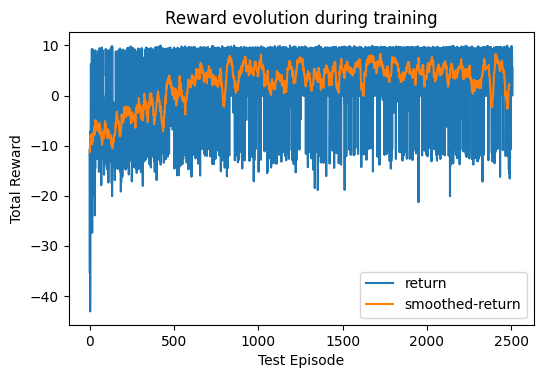

In [49]:
sf.plot_returns(stats, env_name)

Plot saved at ../weights/Noisy_Dueling_Double_DQN_Prio_n_step_4_adaptive_training_fixed/stats/plots/losses_plot.png


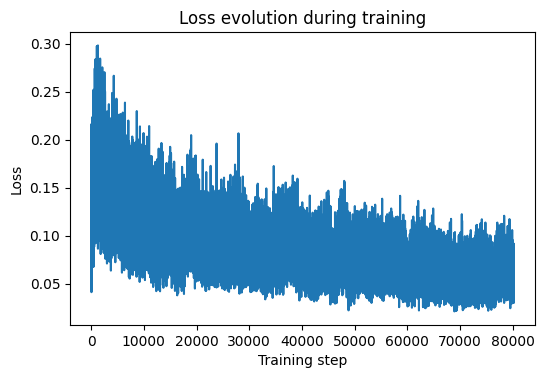

In [50]:
sf.plot_losses(losses, env_name)

Plot saved at ../weights/Noisy_Dueling_Double_DQN_Prio_n_step_4_adaptive_training_fixed/stats/plots/beta_evolution.png


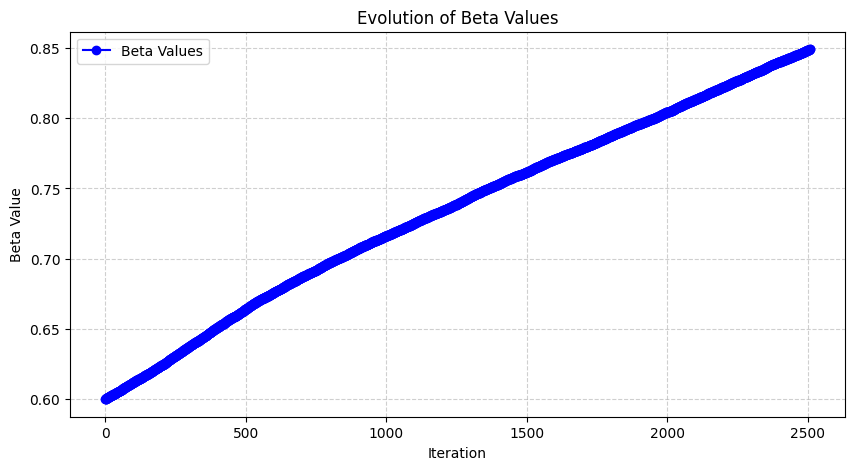

In [51]:
betas = sf.load_betas(env_name)
sf.plot_beta_evolution(env_name, betas)

Plot saved at ../weights/Noisy_Dueling_Double_DQN_Prio_n_step_4_adaptive_training_fixed/stats/plots/epsilon_evolution.png


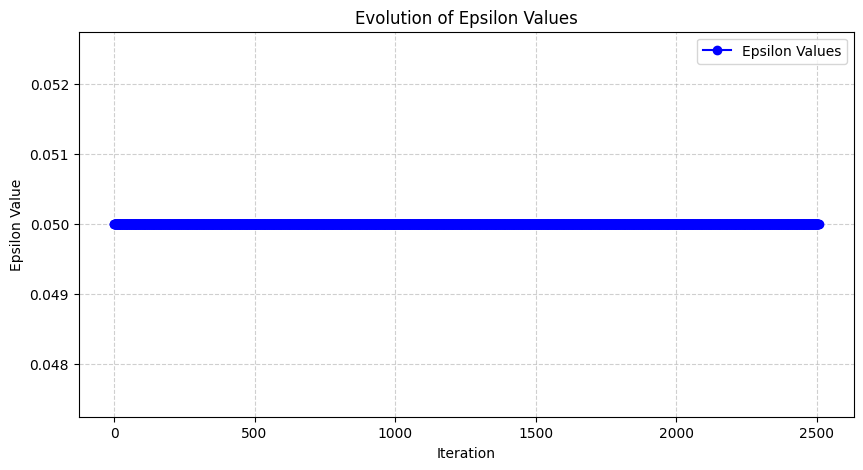

In [52]:
epsilons = sf.load_epsilons(env_name)
sf.plot_epsilon_evolution(env_name, epsilons)

Plot saved at ../weights/Noisy_Dueling_Double_DQN_Prio_n_step_4_adaptive_training_fixed/stats/plots/match_evolution.png


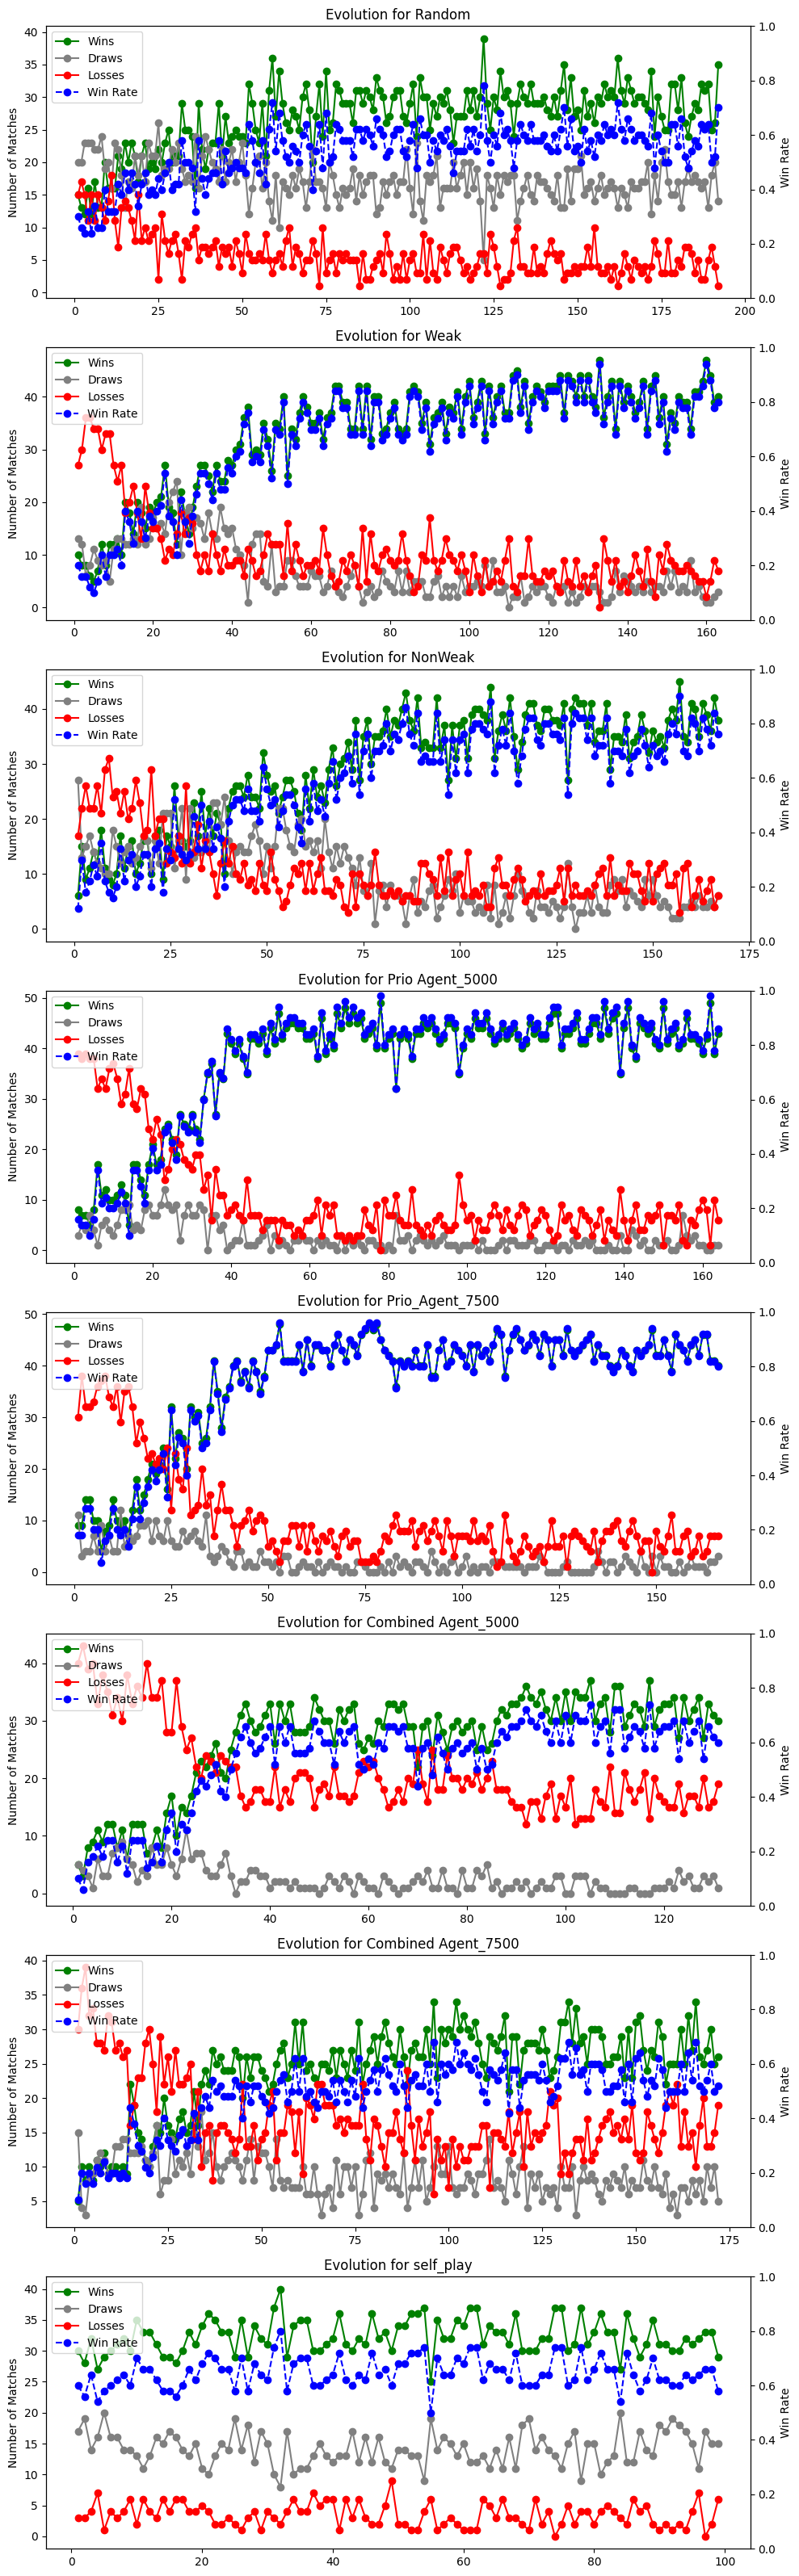

In [53]:
match_history = sf.load_match_history(env_name)
sf.plot_match_evolution_by_chunks(env_name, match_history,  [
    "Random",
    "Weak",
    "NonWeak",
    "Prio Agent_5000",
    "Prio_Agent_7500",
    "Combined Agent_5000",
    "Combined Agent_7500",
    "self_play",
], 50)

#sf.plot_match_evolution_by_chunks(env_name, match_history,  ["Weak", "NonWeak" ],50)


In [54]:
def test_agent(agent = agent, opponent = RandomAgent(seed), test_episodes  = len(SEEDS_TEST), max_steps = 30000, opponent_name = "random", agent_name = "prio_agent", env_name = env_name):
   
    test_rewards = []
    test_name = f"{opponent_name}_vs_{agent_name}"
  
    won_games = 0
    lost_games = 0
    tied_games = 0
    for episode in range(test_episodes):

        obs_agent1, _ = env.reset(seed = SEEDS_TEST[episode])
       #state = env.reset(seed = seed)
        env.action_space.seed(seed = SEEDS_TEST[episode])
        obs_agent1= obs_agent1[0] if isinstance(obs_agent1, tuple) else obs_agent1  # Handle Gymnasium compatibility

        obs_agent2 = env.obs_agent_two()
        obs_agent2 = obs_agent2[0] if isinstance(obs_agent2, tuple) else obs_agent2

        total_reward = 0

        frames = []
        
        for t in range(max_steps):

            done = False

            frame = env.render(mode = "rgb_array")
            if frame is not None:
                frames.append(frame)

            a1_cont = agent.get_step(obs_agent1)
            a2 = opponent.act(obs_agent2)

            full_action = np.hstack([a1_cont, a2])

            next_state, reward, done, truncated, _ = env.step(full_action)
            
            total_reward += reward

            obs_agent1 = next_state
            obs_agent2 = env.obs_agent_two()

            if done or truncated: break

        test_rewards.append(total_reward)
        won = env.winner == 1
        if won:
            won_games += 1
        tie = env.winner == 0
        if tie:
            tied_games += 1
        lost = not won and not tie
        if lost:
            lost_games += 1
        string = "Won" if won else "Tie" if tie else "Lost"
        print(f"Test Episode {episode+1}, Total Reward: {total_reward}", string)
       
        
        if frames:
            os.makedirs(f"{env_name}/test_gifs/{test_name}", exist_ok=True)
            imageio.mimsave(f"{env_name}/test_gifs/{test_name}/test_episode_{episode+1}.gif", frames, fps=30)

    env.close()
    winrate = won_games / test_episodes
    tie_rate = tied_games / test_episodes
    loss_rate = lost_games / test_episodes
    print(f"Winrate: {winrate}, Tie Rate: {tie_rate}, Loss Rate: {loss_rate}")
    results_name = f"test_results_{test_name}"
    sf.save_test_results(env_name, test_rewards, name = results_name)

Test Episode 1, Total Reward: 8.786699001439366 Won
Test Episode 2, Total Reward: 9.435562960188154 Won
Test Episode 3, Total Reward: 0.0 Tie
Test Episode 4, Total Reward: 9.133422865340114 Won
Test Episode 5, Total Reward: 0.0 Tie
Test Episode 6, Total Reward: -12.726869423114124 Lost
Test Episode 7, Total Reward: -0.4126571062805383 Tie
Test Episode 8, Total Reward: 9.042521074862687 Won
Test Episode 9, Total Reward: 8.911098388587199 Won
Test Episode 10, Total Reward: 9.01788266534829 Won
Winrate: 0.6, Tie Rate: 0.3, Loss Rate: 0.1
Plot saved at ../weights/Noisy_Dueling_Double_DQN_Prio_n_step_4_adaptive_training_fixed/stats/plots/test_results_random_vs_prio_agent.png


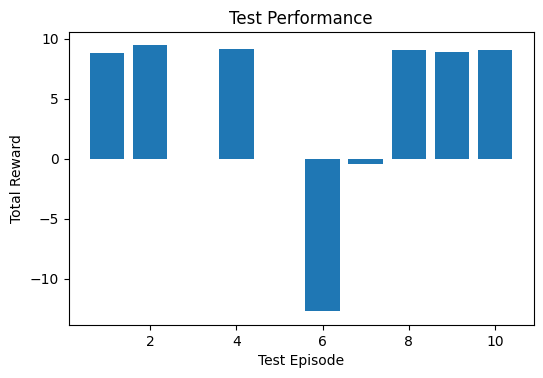

In [55]:
test_agent()

Test Episode 1, Total Reward: 9.43000655609707 Won
Test Episode 2, Total Reward: 8.689451302566715 Won
Test Episode 3, Total Reward: 9.58111012120254 Won
Test Episode 4, Total Reward: 9.150691846901278 Won
Test Episode 5, Total Reward: -11.742900739877527 Lost
Test Episode 6, Total Reward: 9.346893751318493 Won
Test Episode 7, Total Reward: 9.704840424808639 Won
Test Episode 8, Total Reward: 8.913712355146007 Won
Test Episode 9, Total Reward: 9.49526894990625 Won
Test Episode 10, Total Reward: 8.969177626060414 Won
Winrate: 0.9, Tie Rate: 0.0, Loss Rate: 0.1
Plot saved at ../weights/Noisy_Dueling_Double_DQN_Prio_n_step_4_adaptive_training_fixed/stats/plots/test_results_weak_vs_prio_agent.png


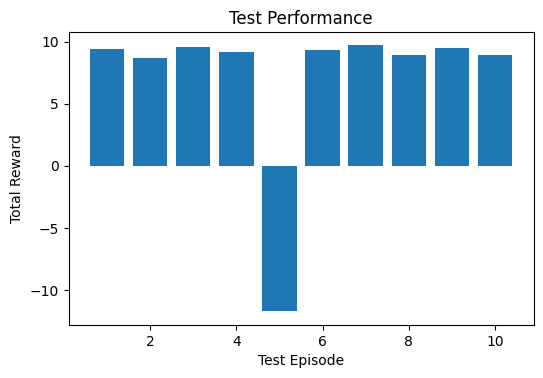

In [56]:
test_agent(opponent = h_env.BasicOpponent(weak=True), opponent_name = "weak", agent_name = "prio_agent")



Test Episode 1, Total Reward: 8.981382810092928 Won
Test Episode 2, Total Reward: 9.517306248278931 Won
Test Episode 3, Total Reward: 8.4162509441757 Won
Test Episode 4, Total Reward: 9.171588787863357 Won
Test Episode 5, Total Reward: -6.04047702564254 Tie
Test Episode 6, Total Reward: 9.271818815371109 Won
Test Episode 7, Total Reward: 8.964139738499355 Won
Test Episode 8, Total Reward: 8.929195148809107 Won
Test Episode 9, Total Reward: 7.066701526892116 Won
Test Episode 10, Total Reward: 8.33494961880151 Won
Winrate: 0.9, Tie Rate: 0.1, Loss Rate: 0.0
Plot saved at ../weights/Noisy_Dueling_Double_DQN_Prio_n_step_4_adaptive_training_fixed/stats/plots/test_results_non_weak_vs_prio_agent.png


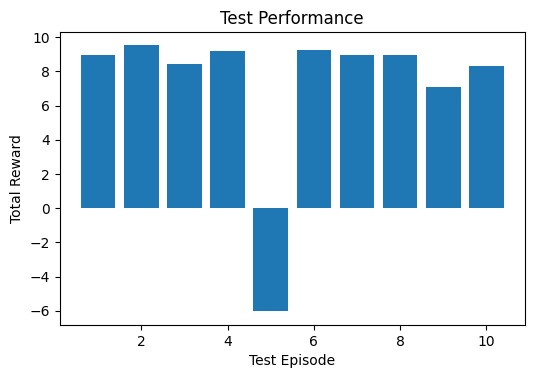

In [57]:
test_agent(opponent = h_env.BasicOpponent(weak=False), opponent_name = "non_weak", agent_name = "prio_agent")

Test Episode 1, Total Reward: -17.381766334117714
Test Episode 2, Total Reward: -11.682074019891017
Test Episode 3, Total Reward: 9.522874320736133
Test Episode 4, Total Reward: 9.143677651416073
Test Episode 5, Total Reward: -10.65393743063512
Test Episode 6, Total Reward: -11.312063856342778
Test Episode 7, Total Reward: -10.569499803260099
Test Episode 8, Total Reward: -13.18249551199366
Test Episode 9, Total Reward: -10.715865402909593
Test Episode 10, Total Reward: 9.075581083099879
Plot saved at ../weights/Noisy_Dueling_Double_DQN_Prio_n_step_4_adaptive_training_fixed/stats/plots/test_results_selfplay.png


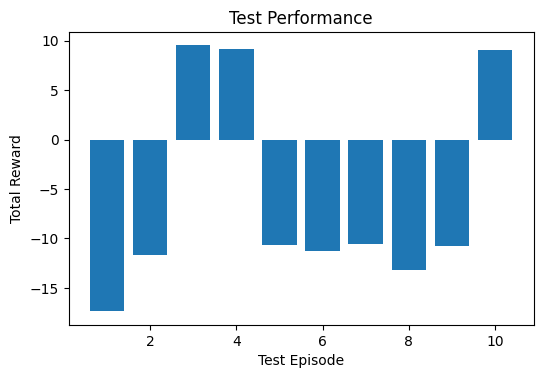

In [58]:
test_episodes = len(SEEDS_TEST)
test_rewards = []

opponent = copy.deepcopy(agent)
#opponent.Q.load(env_name, name = "episode_1500")

max_steps = 30000

for episode in range(test_episodes):

    state, _ = env.reset(seed = SEEDS_TEST[episode])
    env.action_space.seed(seed)
    state = state[0] if isinstance(state, tuple) else state  # Handle Gymnasium compatibility

    obs_agent2 = env.obs_agent_two()
    obs_agent2 = obs_agent2[0] if isinstance(obs_agent2, tuple) else obs_agent2

    total_reward = 0

    frames = []
    
    for t in range(max_steps):

        done = False

        frame = env.render(mode = "rgb_array")
        if frame is not None:
            frames.append(frame)

        a1 = agent.act(state, eps = 0.0)
        a2 = opponent.act(obs_agent2)

        if(USE_MORE_ACTIONS):
            a1_cont = MORE_ACTIONS[a1]
            a2 = MORE_ACTIONS[a2]
        else: 
            a1_cont = env.discrete_to_continous_action(a1)
            a2 = env.discrete_to_continous_action(a2)

        full_action = np.hstack([a1_cont, a2])

        next_state, reward, done, truncated, _ = env.step(full_action)
        
        total_reward += reward

        state = next_state
        obs_agent2 = env.obs_agent_two()

        if done or truncated: break

    test_rewards.append(total_reward)
    print(f"Test Episode {episode+1}, Total Reward: {total_reward}")
    
    if frames:
        os.makedirs(f"{env_name}/test_gifs/selfplay", exist_ok=True)
        imageio.mimsave(f"{env_name}/test_gifs/selfplay/test_episode_{episode+1}.gif", frames, fps=30)

env.close()

sf.save_test_results(env_name, test_rewards, name = "test_results_selfplay")